# Assignment 2

## Not an ideal Network

### In this Assignment we are going to run a simple CNN model on top of MNIST data and we are going to analyze the result. So lets fist install keras library with which we are goinf to build the model.

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


### Let's import all importent pakages from keras with which we are going to build the CNN model

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

### Now we are going to load the MNIST data and split it in train and test to train the model on top of train data and to test it on test data

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


### Let's see how our MNIST data looks like in below:

(60000, 28, 28)


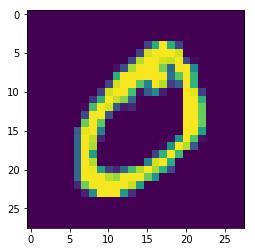

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

### Now we have to shape all the image size in test and train so that we can apply out CNN model based on the input image shape and we will not have any problem while testing with test images with same shape. Let's shape train and test data to (28 , 28 , 1) which is going to be the input dimension of our model.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Here in the below section we are going to scale our pixel values.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Let's see how Y looks like as Y values are the actual no corrosponding to an hand written image.

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### Now we have to convert Y values from 1-dimentional class matrix to 10 dimentional class matrix so that we can predict out of 10 class which class it is predicting.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Now let's build our 1st CNN model which we are going to apply on our train data for training the model later. Here we are using 2-D convolution and maxpooling layers and softmax activation function to get output.

In [0]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
#Layer 1:
# input dimension 28 * 28 * 1
# receptive field 3 * 3
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#Layer 2:
# input dimension 26 * 26 * 32
# receptive field 5 * 5
model.add(Convolution2D(64, 3, 3, activation='relu'))
#Layer 3:
# input dimension 24 * 24 * 64
# receptive field 7 * 7
model.add(Convolution2D(128, 3, 3, activation='relu'))
#Layer 4:
# input dimension 22 * 22 * 128
# receptive field 14 * 14
model.add(MaxPooling2D(pool_size=(2, 2)))
#Layer 5:
# input dimension 11 * 11 * 128
# receptive field 16 * 16
model.add(Convolution2D(256, 3, 3, activation='relu'))
#Layer 6:
# input dimension 9 * 9 * 256
# receptive field 18 * 18
model.add(Convolution2D(512, 3, 3, activation='relu'))
#Layer 7:
# input dimension 7 * 7 * 512
# receptive field 20 * 20
model.add(Convolution2D(1024, 3, 3, activation='relu'))
#Layer 8:
# input dimension 5 * 5 * 1024
# receptive field 22 * 22
model.add(Convolution2D(2048, 3, 3, activation='relu'))
#Layer 8:
# input dimension 3 * 3 * 2048
# receptive field 24 * 24
model.add(Convolution2D(10, 3, 3, activation='relu'))
# output dimension 1 * 1 * 10

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/

### Lets's compile the model with adam optimizer ,loss as cross entropy and validation matrix as accuracy:

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

### Let's train the model with training data and let's get the training accuracy

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3028 - acc: 0.0987
Epoch 2/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - a

### Here we can see the model's score after applying the model in test data.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[2.3025851249694824, 0.098]


### If we predict output class Y in test data we will get the prediction result which we can compare with test result. Let's compare test and train result:

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


### In the above result and from the test accuracy we can see that this model we have build is not at all good for this MNIST dataset. Here are few reasons why:
#### 1. Here we are increasing no of channels in each layer as 32,64,128,256,512,1024,2048 etc. But MNIST dataset is not at all complex dataset since there are not many different kind of edges, gradient, texture information is present which our network can learn. Because of which we don't even need these many no of channel and because of which we are creating so much of redundant data. And because of this redundant information our model is not able to learn properly.
#### 2. Secondly we can say that in the last layer we are directly reducing channel from 2048 to 10 which is going cause huge information loss, because of which mostly our model is becoming a very weak learner.
#### 3. also here we can see for this simple data set we have created 25million parameter which our model is trying to learn at the time of training. But since there are this many parameter and we are only using 10 epochs, thats why mostly our model is not getting enough time to learn all the parameters and update them corrospondingly through backpropagation.